In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('movieReplicationSet-2.csv')
names = data.columns[401:421].tolist() # sensation seeking
names.extend(data.columns[465:474]) # movie experience
clean_data = data.dropna(subset=names)[names] # dropping missing vals
clean_data.shape

(1030, 29)

In [4]:
clean_data # combined data of sensation seeking & movie experience

,I enjoy rollercoasters,Have you ever bungee-jumped?,I enjoy impulse shopping,I sometimes go out on weeknights even if I have work to do,I enjoy doing things without too much planning,Have you ever been rock climbing?,I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve,I enjoy going to large music or dance festivals,I enjoy watching horror movies,No risk - No fun,...,Is talkative,I have trouble following the story of a movie,I have trouble remembering the story of a movie a couple of days after seeing it,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching
0,5.0,2.0,5.0,1.0,2.0,3.0,1.0,4.0,1.0,3.0,...,1.0,4.0,1.0,1.0,6.0,2.0,5.0,5.0,5.0,1.0
1,5.0,2.0,4.0,2.0,1.0,1.0,2.0,4.0,1.0,3.0,...,2.0,3.0,1.0,3.0,1.0,1.0,6.0,5.0,3.0,2.0
2,4.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,1.0,3.0,...,4.0,3.0,1.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0
3,5.0,2.0,5.0,4.0,2.0,4.0,4.0,5.0,4.0,1.0,...,5.0,1.0,1.0,3.0,1.0,1.0,4.0,5.0,3.0,1.0
4,1.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,4.0,...,4.0,3.0,4.0,2.0,3.0,2.0,5.0,6.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,4.0,2.0,5.0,2.0,1.0,3.0,2.0,5.0,1.0,3.0,...,4.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,4.0,4.0
1093,5.0,2.0,5.0,4.0,1.0,4.0,4.0,5.0,5.0,4.0,...,5.0,4.0,5.0,5.0,3.0,5.0,5.0,5.0,6.0,5.0
1094,5.0,2.0,2.0,3.0,1.0,4.0,1.0,4.0,1.0,2.0,...,4.0,2.0,3.0,6.0,3.0,1.0,6.0,6.0,4.0,2.0
1095,4.0,2.0,5.0,2.0,5.0,1.0,2.0,1.0,2.0,2.0,...,4.0,5.0,3.0,1.0,1.0,1.0,4.0,3.0,3.0,1.0


In [5]:
sensation = clean_data.iloc[:,0:19] # extract sensation data

In [7]:
sensation.columns

Index(['I enjoy rollercoasters ', 'Have you ever bungee-jumped?',
       'I enjoy impulse shopping',
       'I sometimes go out on weeknights even if I have work to do',
       'I enjoy doing things without too much planning ',
       'Have you ever been rock climbing?',
       'I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve',
       'I enjoy going to large music or dance festivals ',
       'I enjoy watching horror movies', 'No risk - No fun',
       'I like to be surprised even if it startles or scares me',
       'Have you ever parachuted?', 'I enjoy haunted houses',
       'I had a sheltered upbringing', 'My life is very stressful',
       'I value my life to be well ordered and predictable',
       'Have you ridden a motorcycle?', 'Have you gambled or bet for money?',
       'Have you ever been sky-diving?'],
      dtype='object')

In [8]:
zscoredData = stats.zscore(sensation) # run PCA on sensation seeking
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData = pca.fit_transform(zscoredData)
covarExplained = eigVals/sum(eigVals)*100
for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))

17.693
9.368
8.618
6.804
5.826
5.494
5.071
4.974
4.589
4.372
4.031
3.921
3.776
3.236
3.121
2.938
2.646
1.814
1.707


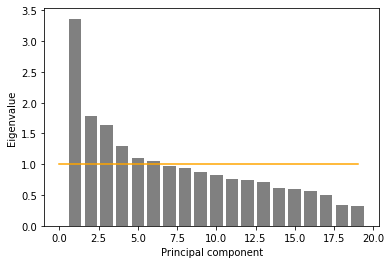

In [9]:
numClasses = 19 # total sensation variables
x = np.linspace(1,numClasses,numClasses)
plt.bar(x, eigVals, color='gray')
plt.plot([0,numClasses],[1,1],color='orange') # Orange Kaiser criterion line 
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [10]:
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))

# 2) The "elbow" criterion: Pick only factors left of the biggest/sharpest
# drop. Here, this would yield 1 factor.
print('Number of factors selected by elbow criterion: 1')

# 3) Number of factors that account for 90% of the variance (Eigenvalues that 
# add up to 90% of the Eigensum. To account for at least 90% of the variability 
# in this data, we need 3 factors.
threshold = 90
eigSum = np.cumsum(covarExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)

Number of factors selected by Kaiser criterion: 6
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 15


In [11]:
rotatedData.shape 

(1030, 19)

In [12]:
pca_sensation = rotatedData[:,0:6] # keep first 6 PCAs
pca_sensation.shape

(1030, 6)

In [13]:
pca_sensation_names = ['PCA_S1','PCA_S2','PCA_S3','PCA_S4','PCA_S5','PCA_S6']

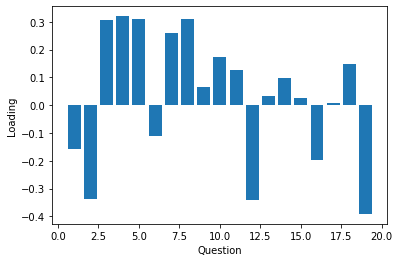

1 ['I enjoy rollercoasters ']
2 ['Have you ever bungee-jumped?']
3 ['I enjoy impulse shopping']
4 ['I sometimes go out on weeknights even if I have work to do']
5 ['I enjoy doing things without too much planning ']
6 ['Have you ever been rock climbing?']
7 ['I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve']
8 ['I enjoy going to large music or dance festivals ']
9 ['I enjoy watching horror movies']
10 ['No risk - No fun']
11 ['I like to be surprised even if it startles or scares me']
12 ['Have you ever parachuted?']
13 ['I enjoy haunted houses']
14 ['I had a sheltered upbringing']
15 ['My life is very stressful']
16 ['I value my life to be well ordered and predictable']
17 ['Have you ridden a motorcycle?']
18 ['Have you gambled or bet for money?']
19 ['Have you ever been sky-diving?']


In [15]:
whichPrincipalComponent = 1 # Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

range_sensationSeeking = [i for i in range(401,420)]
questions_sensationSeeking = pd.read_csv('movieReplicationSet-2.csv', usecols=range_sensationSeeking, header=None, nrows=1)
index = 401
counter = 1
for each_question in questions_sensationSeeking:
    print(counter, questions_sensationSeeking[index].values)
    index+=1
    counter += 1 # Display questions

In [20]:
experience = clean_data.iloc[:,20:] # extract experience data

In [21]:
zscoredData = stats.zscore(experience) # conduct PCA on experience data
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData2 = pca.fit_transform(zscoredData)
covarExplained = eigVals/sum(eigVals)*100
for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))

30.532
20.343
9.427
8.892
7.983
6.768
6.264
5.172
4.62


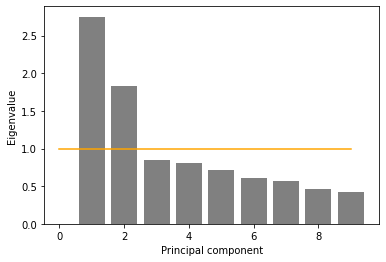

In [22]:
numClasses = 9 # 9 total experience columns
x = np.linspace(1,numClasses,numClasses)
plt.bar(x, eigVals, color='gray')
plt.plot([0,numClasses],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [23]:
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))

# 2) The "elbow" criterion: Pick only factors left of the biggest/sharpest
# drop. Here, this would yield 1 factor.
print('Number of factors selected by elbow criterion: 1')

# 3) Number of factors that account for 90% of the variance (Eigenvalues that 
# add up to 90% of the Eigensum. To account for at least 90% of the variability 
# in this data, we need 3 factors.
threshold = 90
eigSum = np.cumsum(covarExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)

Number of factors selected by Kaiser criterion: 2
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 7


In [24]:
pca_experience = rotatedData2[:,0:2] # we will use 2 PCAs for movie experience
pca_experience.shape

(1030, 2)

In [25]:
pca_experience_names = ['PCA_E1','PCA_E2'] # naming PCAs

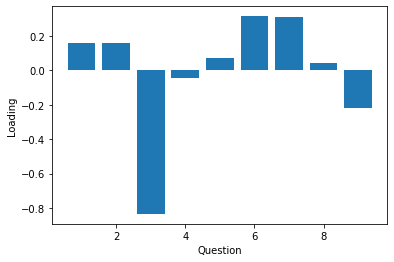

In [27]:
whichPrincipalComponent = 2 # Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

In [28]:
allpca = np.concatenate([pca_experience, pca_sensation],axis=1) # move all PCAs together
allpca

array([[ 0.89617568, -1.16972181, -0.75985841, ...,  0.66275222,
         1.13489227, -1.22392742],
       [-0.49038412, -1.11979975, -1.40794499, ..., -0.24687728,
        -0.92573656,  0.54250694],
       [ 1.77248715, -0.80688141, -2.01665237, ..., -0.79634587,
        -0.86966152,  0.05969991],
       ...,
       [ 1.32687761, -1.55741593, -1.29594542, ..., -1.47820717,
         0.38470468,  0.62679294],
       [-1.60900805,  1.57897416, -1.78741983, ...,  1.12733078,
         1.21241619, -0.58451052],
       [-0.11617131,  0.13342897, -1.70293144, ..., -1.98711846,
         1.36191916, -0.40796526]])

In [29]:
pca_names = pca_experience_names+pca_sensation_names
pca_names

['PCA_E1',
 'PCA_E2',
 'PCA_S1',
 'PCA_S2',
 'PCA_S3',
 'PCA_S4',
 'PCA_S5',
 'PCA_S6']

In [30]:
allpca.shape

(1030, 8)

In [31]:
combined = pd.DataFrame(allpca, columns=pca_names)
combined

,PCA_E1,PCA_E2,PCA_S1,PCA_S2,PCA_S3,PCA_S4,PCA_S5,PCA_S6
0,0.896176,-1.169722,-0.759858,0.099096,0.273555,0.662752,1.134892,-1.223927
1,-0.490384,-1.119800,-1.407945,-0.109071,0.287785,-0.246877,-0.925737,0.542507
2,1.772487,-0.806881,-2.016652,1.011995,1.072385,-0.796346,-0.869662,0.059700
3,-1.846980,-1.627252,-0.038785,-1.102202,-0.809451,-1.614211,-1.008100,-2.102823
4,1.405430,-0.122564,0.357928,0.666125,1.216825,2.355060,0.796106,0.285028
...,...,...,...,...,...,...,...,...
1025,1.918303,0.433735,-0.967327,0.855936,0.945134,-1.928743,-0.546636,-1.246746
1026,3.762664,1.839937,1.413407,-0.284559,-0.324725,-2.875672,-1.573248,0.132909
1027,1.326878,-1.557416,-1.295945,2.172044,0.851558,-1.478207,0.384705,0.626793
1028,-1.609008,1.578974,-1.787420,-0.864765,0.390251,1.127331,1.212416,-0.584511


In [32]:
correlationMatrix = combined.corr() # correlation matrix
correlationMatrix

,PCA_E1,PCA_E2,PCA_S1,PCA_S2,PCA_S3,PCA_S4,PCA_S5,PCA_S6
PCA_E1,1.000000e+00,-2.325232e-17,2.151307e-02,-1.337539e-01,8.074612e-02,-1.301286e-01,-8.188755e-02,-1.147803e-02
PCA_E2,-2.325232e-17,1.000000e+00,-4.688813e-02,4.620083e-02,3.717444e-02,1.352250e-02,8.961390e-02,-3.792836e-02
PCA_S1,2.151307e-02,-4.688813e-02,1.000000e+00,2.874801e-16,1.824816e-16,1.236777e-16,7.487343e-17,1.582341e-17
PCA_S2,-1.337539e-01,4.620083e-02,2.874801e-16,1.000000e+00,-9.275044e-17,-1.301787e-16,-5.482840e-17,1.609223e-16
PCA_S3,8.074612e-02,3.717444e-02,1.824816e-16,-9.275044e-17,1.000000e+00,3.634611e-16,-3.026321e-16,5.193663e-16
PCA_S4,-1.301286e-01,1.352250e-02,1.236777e-16,-1.301787e-16,3.634611e-16,1.000000e+00,-2.130056e-16,-2.157302e-16
PCA_S5,-8.188755e-02,8.961390e-02,7.487343e-17,-5.482840e-17,-3.026321e-16,-2.130056e-16,1.000000e+00,-2.104715e-16
PCA_S6,-1.147803e-02,-3.792836e-02,1.582341e-17,1.609223e-16,5.193663e-16,-2.157302e-16,-2.104715e-16,1.000000e+00


<AxesSubplot:>

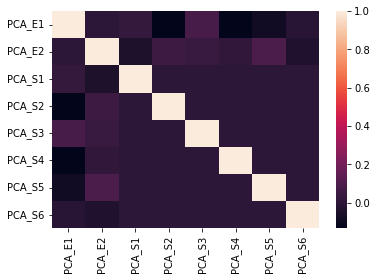

In [33]:
import seaborn as sns
sns.heatmap(correlationMatrix) # heatmap of correlation matrix

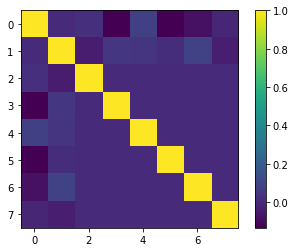

In [34]:
r = np.corrcoef(combined,rowvar=False)
plt.imshow(r) 
plt.colorbar()
plt.show()

In [31]:
from scipy import stats
stats.pearsonr(combined['PCA_S1'].values, combined['PCA_E1'].values)

(0.021513071097718967, 0.49039945696212983)